In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("TRAIN6.csv", index_col = 0)
df.head(2)

,depth,table,x,y,z,price,cut_encoded,color_D,color_E,color_F,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,,,,,,,,,,,,,,,,,,,,,
0.30,62.4,58.0,4.31,4.28,2.68,6.353,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1.01,62.7,56.0,6.42,6.46,4.04,9.183,4,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Reparto de datos en train y test
# ==============================================================================
# Lo primero que hacemos es definir cuál es nuestra variable Y y nuestras variables X
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [4]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())



Datos de entrenamiento
-----------------------
count    32364.000000
mean         7.786349
std          1.018371
min          5.787000
25%          6.851000
50%          7.784000
75%          8.584000
max          9.842000
Name: price, dtype: float64


In [5]:
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())

Datos de testeo
-----------------------
count    8091.000000
mean        7.773714
std         1.010634
min         5.814000
25%         6.851500
50%         7.761000
75%         8.572500
max         9.842000
Name: price, dtype: float64


In [6]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs


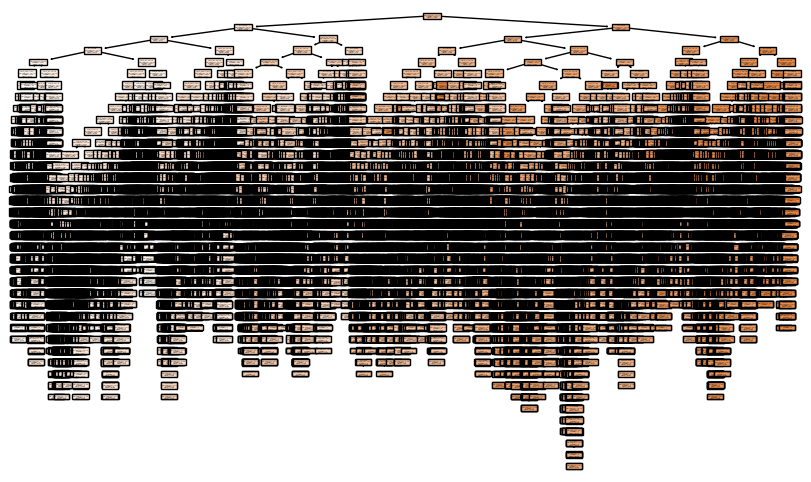

In [7]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();

In [8]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

4.58257569495584

In [9]:
# max depth

print(regressor.tree_.max_depth)

39


In [10]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [11]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df
    

In [12]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.090752,0.019255,0.138763,0.981146,test,Decission Tree I
1,0.000224,0.000017,0.004178,0.999983,train,Decission Tree I


In [13]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=3,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [14]:
# ajustamos el modelo de nuevo

%time
gs.fit(X_train, y_train)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 21.9 µs
Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 1/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.642, test=-0.653) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.874, test=-0.885) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.891, test=-0.889) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.353, test=-0.361) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.261, test=-0.260) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.904, test=-0.911) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.342, test=-0.361) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=

[CV 4/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.092, test=-0.090) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.274, test=-0.274) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.075, test=-0.075) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.743, test=-0.756) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.136, test=-0.138) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.123, test=-0.119) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.178, test=-0.184) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.079, test=-0.080) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=3, min

[CV 5/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.586, test=-0.593) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.078, test=-0.080) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.073, test=-0.076) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.218, test=-0.217) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.073, test=-0.074) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.789, test=-0.769) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.064, test=-0.067) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.082, test=-0.085) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=6

[CV 5/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.304, test=-0.294) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.067, test=-0.066) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.259, test=-0.260) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.190, test=-0.192) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.249, test=-0.239) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.435, test=-0.442) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.127, test=-0.125) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.216, test=-0.214) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=2, mi

[CV 3/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.083, test=-0.081) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.072, test=-0.072) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.070, test=-0.069) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.220, test=-0.228) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.061, test=-0.062) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.147, test=-0.144) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.099, test=-0.099) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=5, min_samples_split=10;, score=(train=-0.097, test=-0.100) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=5, min_

[CV 4/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.333, test=-0.337) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.744, test=-0.754) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.172, test=-0.173) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.173, test=-0.176) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.189, test=-0.185) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.110, test=-0.107) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.177, test=-0.175) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.249, test=-0.244) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=1, min

[CV 3/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.133, test=-0.144) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.193, test=-0.200) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.070, test=-0.071) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.079, test=-0.078) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.095, test=-0.098) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.066, test=-0.068) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.081, test=-0.082) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.058, test=-0.061) total time=   0.0s
[CV 1/10] END max_depth=6, max_features

[CV 8/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.086, test=-0.088) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.059, test=-0.063) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.061, test=-0.065) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.055, test=-0.058) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.052, test=-0.056) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.059, test=-0.062) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.055, test=-0.055) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.191, test=-0.192) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=6, min_

[CV 9/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.173, test=-0.181) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.577, test=-0.561) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.278, test=-0.278) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.071, test=-0.075) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.398, test=-0.404) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.294, test=-0.297) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.113, test=-0.121) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.147, test=-0.155) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=2

[CV 5/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.048, test=-0.049) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.053, test=-0.054) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.054, test=-0.058) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.057, test=-0.059) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.052, test=-0.053) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.047, test=-0.050) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=5, min_samples_split=50;, score=(train=-0.047, test=-0.048) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=5, min_samples_split=50;, score=(train=-0.110, test=-0.114) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=5, min_

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [15]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_

best_tree = gs.best_estimator_
best_tree


DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_split=10)

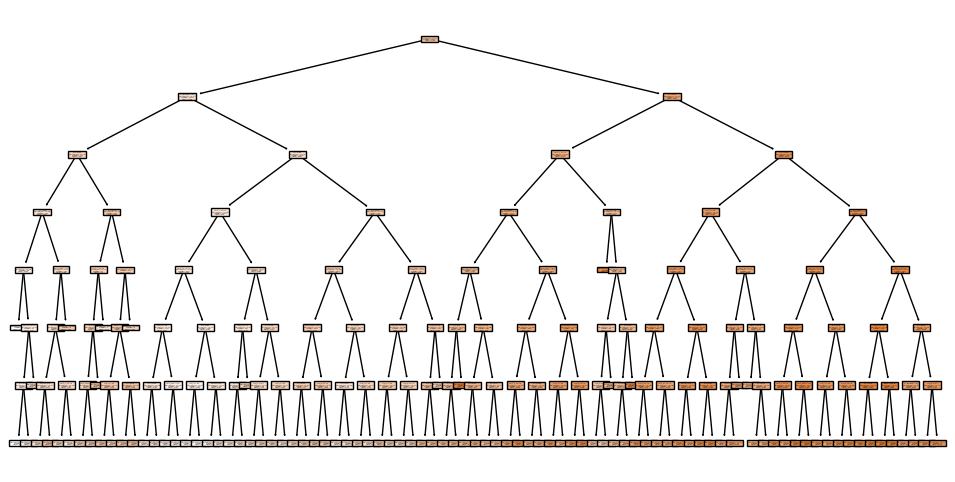

In [16]:
# volvamos a intentar visualizar el árbol a ver como se ve: 

fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);



In [17]:
 #guardamos la imagen 

fig.savefig("decision_tree2.png", facecolor="white")

In [18]:
print(tree.export_text(best_tree, feature_names= list(X_train.columns)))

|--- y <= 5.61
|   |--- cut_encoded <= 0.50
|   |   |--- z <= 3.32
|   |   |   |--- x <= 4.65
|   |   |   |   |--- z <= 2.40
|   |   |   |   |   |--- value: [5.89]
|   |   |   |   |--- z >  2.40
|   |   |   |   |   |--- clarity_IF <= 0.50
|   |   |   |   |   |   |--- y <= 4.04
|   |   |   |   |   |   |   |--- value: [5.87]
|   |   |   |   |   |   |--- y >  4.04
|   |   |   |   |   |   |   |--- value: [6.52]
|   |   |   |   |   |--- clarity_IF >  0.50
|   |   |   |   |   |   |--- value: [7.10]
|   |   |   |--- x >  4.65
|   |   |   |   |--- clarity_VVS2 <= 0.50
|   |   |   |   |   |--- x <= 4.95
|   |   |   |   |   |   |--- table <= 61.50
|   |   |   |   |   |   |   |--- value: [6.89]
|   |   |   |   |   |   |--- table >  61.50
|   |   |   |   |   |   |   |--- value: [7.68]
|   |   |   |   |   |--- x >  4.95
|   |   |   |   |   |   |--- clarity_I1 <= 0.50
|   |   |   |   |   |   |   |--- value: [7.09]
|   |   |   |   |   |   |--- clarity_I1 >  0.50
|   |   |   |   |   |   |   |--- value

In [19]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)


In [20]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [21]:
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.171856,0.049663,0.222852,0.951371,test,Decision tree II
1,0.172955,0.050426,0.224558,0.951375,train,Decision tree II


# prueba predicciones 

In [22]:
df = pd.read_csv("realidad6.csv", index_col = 0)
X_realida = df


In [23]:
X_realida_submision = best_tree.predict(X_realida)
X_realida_submision

array([6.35869481, 8.61098065, 9.3226899 , ..., 6.53785346, 8.73882375,
       7.9384976 ])

In [24]:
submision1 = pd.DataFrame(X_realida_submision)
submision1.reset_index(inplace=True)
submision1.rename(columns={"index":"id",0:"price"}, inplace =True)
submision1

,id,price
0,0,6.358695
1,1,8.610981
2,2,9.322690
3,3,7.938498
4,4,9.021301
...,...,...
13480,13480,8.610981
13481,13481,8.610981
13482,13482,6.537853
13483,13483,8.738824


In [25]:
submision1.to_csv("valen6.csv", index=False)